In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

plt.rcParams['figure.figsize'] = (32,24)

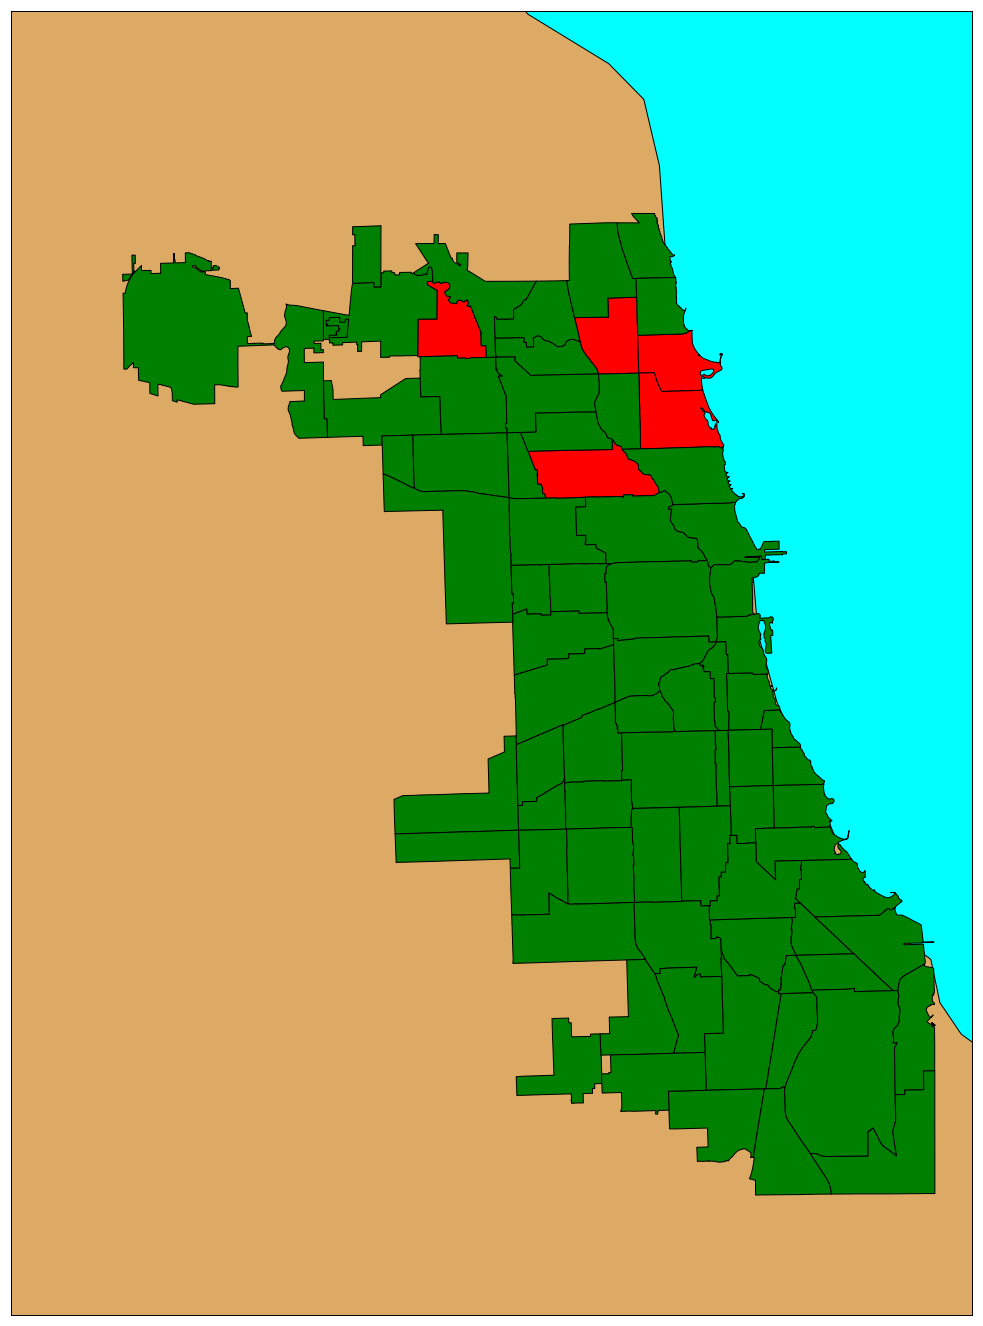

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
mapsy = Basemap(
            llcrnrlon='-88',
            llcrnrlat='41.60',
            urcrnrlon='-87.5',
            urcrnrlat='42.1',
            resolution='h',
            ellps='GRS80',
            k_0=0.9999749999999999,
            projection='tmerc',
            lat_0=36.66666666666666, 
            lon_0=-88.33333333333333)

mapsy.drawmapboundary(fill_color='aqua')
mapsy.fillcontinents(color='#ddaa66',lake_color='aqua')
mapsy.drawcoastlines()

mapsy.readshapefile('community_areas/geo_export_05bfe831-9f3c-46a3-b679-9da7fc7e56ac', 'chicago',
                   drawbounds = False)

red_patches = []
green_patches = []



for info, shape in zip(mapsy.chicago_info, mapsy.chicago):
    if info['area_numbe'] in ['3', '11', '4', '22', '6']:
        red_patches.append( Polygon(np.array(shape), True))
    else:
        green_patches.append( Polygon(np.array(shape), True))

ax.add_collection(PatchCollection(red_patches, facecolor = 'r', edgecolor='k',
                                 linewidths=1., zorder=2))

ax.add_collection(PatchCollection(green_patches, facecolor = 'g', edgecolor='k',
                                 linewidths=1., zorder=2))

plt.show()

({'perimeter': 0.0, 'community': 'DOUGLAS', 'shape_len': 31027.0545098, 'shape_area': 46004621.1581, 'area': 0.0, 'comarea': 0.0, 'area_numbe': '35', 'area_num_1': '35', 'comarea_id': 0.0, 'RINGNUM': 1, 'SHAPENUM': 1}, [(32355.723676224352, 27376.709716651938), (32355.098895935236, 27373.2717181762), (32354.13874353452, 27365.267623691005), (32353.66328506242, 27357.217839592486), (32353.641949021363, 27350.451266061515), (32355.380806017074, 27326.301913764444), (32361.875863168923, 27321.47179946513), (32367.451641680014, 27311.714156591217), (32370.93651848986, 27304.744433455286), (32375.118352372872, 27294.986790582072), (32376.512297002108, 27285.926135262358), (32379.30021673762, 27278.25942457083), (32380.69416136535, 27266.41091047658), (32384.179038174854, 27252.471433720086), (32387.663884505335, 27229.471301644924), (32391.845748868767, 27223.19853558007), (32396.027582751947, 27213.440892706043), (32403.694262965586, 27197.41051424865), (32412.75491828693, 27183.4710374905

({'perimeter': 0.0, 'community': 'FOREST GLEN', 'shape_len': 74493.821604, 'shape_area': 89130893.6364, 'area': 0.0, 'comarea': 0.0, 'area_numbe': '12', 'area_num_1': '12', 'comarea_id': 0.0, 'RINGNUM': 1, 'SHAPENUM': 12}, [(18946.90682073704, 45069.99480337242), (18946.90694265704, 45069.99465097068), (18948.118250759795, 45066.91140992672), (18972.361755965696, 45052.401986509794), (18977.376762316784, 45049.40055394755), (18982.78026752308, 45046.16664996103), (18983.87980524378, 45045.50858544558), (18984.84940646146, 45044.92830604431), (19000.241898206103, 45035.784257277846), (19010.986119695914, 45029.27371625672), (19016.98154768581, 45025.609982450726), (19022.976975677022, 45021.94634008454), (19026.686399095594, 45019.678623550804), (19033.730341184728, 45015.362646918045), (19039.701415606043, 45011.65017549391), (19046.117407477646, 45007.605471406365), (19054.612230946328, 45001.93005357671), (19054.96579965528, 45001.71123722009), (19056.1578748391, 45000.97346734407), 

({'perimeter': 0.0, 'community': 'WEST ENGLEWOOD', 'shape_len': 40195.2033069, 'shape_area': 87947691.9478, 'area': 0.0, 'comarea': 0.0, 'area_numbe': '67', 'area_num_1': '67', 'comarea_id': 0.0, 'RINGNUM': 1, 'SHAPENUM': 65}, [(28601.848928948773, 21734.474553914508), (28602.226150183258, 21722.731683710474), (28602.597885007675, 21709.84465297719), (28602.97147911468, 21693.3984045689), (28603.241136213273, 21680.876464007888), (28603.91169755301, 21652.331886925036), (28604.385205301045, 21635.48381987051), (28604.588354907373, 21628.255686775898), (28605.325972383, 21602.12208251306), (28606.002629735627, 21577.250352774514), (28606.673191076177, 21552.83582395257), (28607.24085173274, 21531.71423899161), (28607.514440760144, 21521.53280135116), (28608.03260179594, 21503.01006830763), (28608.51903308844, 21485.511465314194), (28608.70925915011, 21478.67478764325), (28609.32190837529, 21456.707807714236), (28609.952845637137, 21434.073314450332), (28610.46186265408, 21415.9132941303

({'perimeter': 0.0, 'community': 'OHARE', 'shape_len': 173625.98466, 'shape_area': 371835607.687, 'area': 0.0, 'comarea': 0.0, 'area_numbe': '76', 'area_num_1': '76', 'comarea_id': 0.0, 'RINGNUM': 3, 'SHAPENUM': 75}, [(5335.613937828686, 45052.74494815641), (5325.424026728044, 44993.16993165796), (5325.423843847875, 44993.16892581701), (5325.305550731737, 44992.477272273274), (5295.06171024287, 44997.74669569277), (5270.634349309363, 45002.00253516121), (5270.535593911412, 45002.019725915394), (5262.246876612688, 45003.46381024353), (5262.397752916218, 44996.63877595484), (5263.606592133652, 44941.9522125934), (5263.830742502145, 44931.80826542666), (5263.888807017622, 44929.17960400891), (5264.068334577369, 44921.054595123045), (5265.035192588894, 44877.322382785846), (5265.796919794771, 44842.85376201582), (5266.554562669709, 44808.57305082015), (5267.329396299061, 44773.535092993174), (5268.120689161271, 44737.73866932525), (5268.331519742835, 44728.19841024699), (5268.896802953404,